# PCA & Clustering

## Step 1: Parsing dati

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import io
import os
import pathlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from bioinfokit.visuz import cluster
import dataframe_image as dfi

############################################
############### Parsing dati ###############

#Lettura dati da dataset
path = str(pathlib.Path().absolute()) + "/EsercizioPCA_CLustering_versStudenti.xlsx"
df=pd.read_excel(path, skiprows=1)

#Modifica nomi colonne
col = df.columns.tolist()
col = [x.strip("'") for x in col]
df.columns = col

In [2]:
# dfi.export(df.head(),"wl_real_2.png", max_cols=10)
# print(df.head().to_latex())

## Step 2: Matrice di correlazione

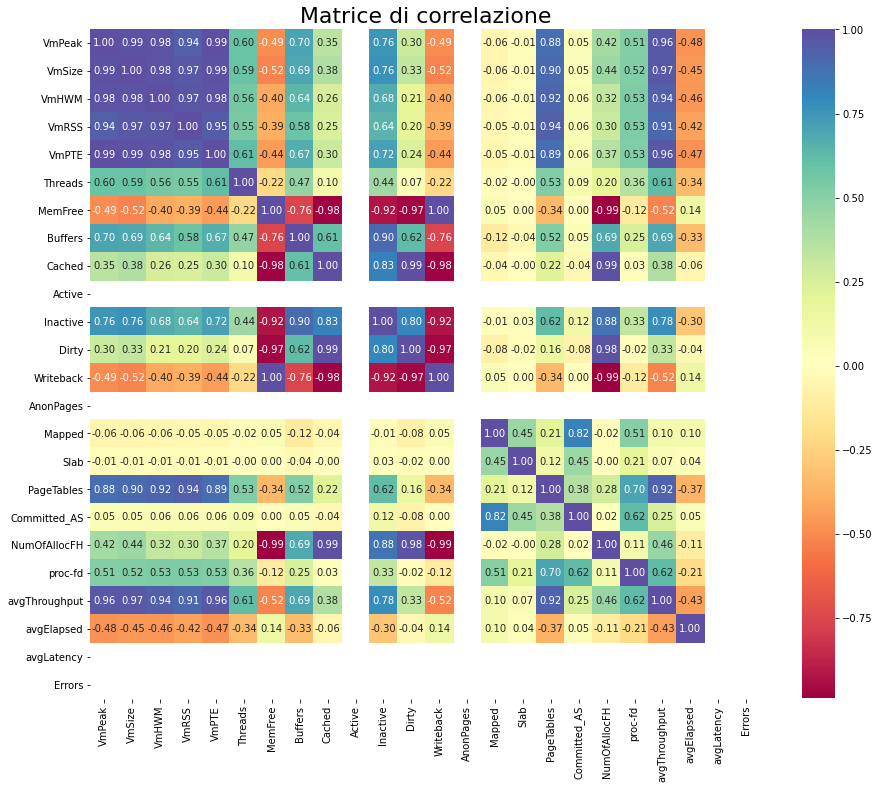

In [3]:
plt.figure(figsize = (15, 15))
corrMatrix = df.corr()
plt.title('Matrice di correlazione', size=22)
sn.heatmap(corrMatrix, annot=True, cmap='Spectral', fmt='.2f', square=True, cbar_kws={"shrink": .82})
plt.show();

### Scree Plot pre giusto per controprova

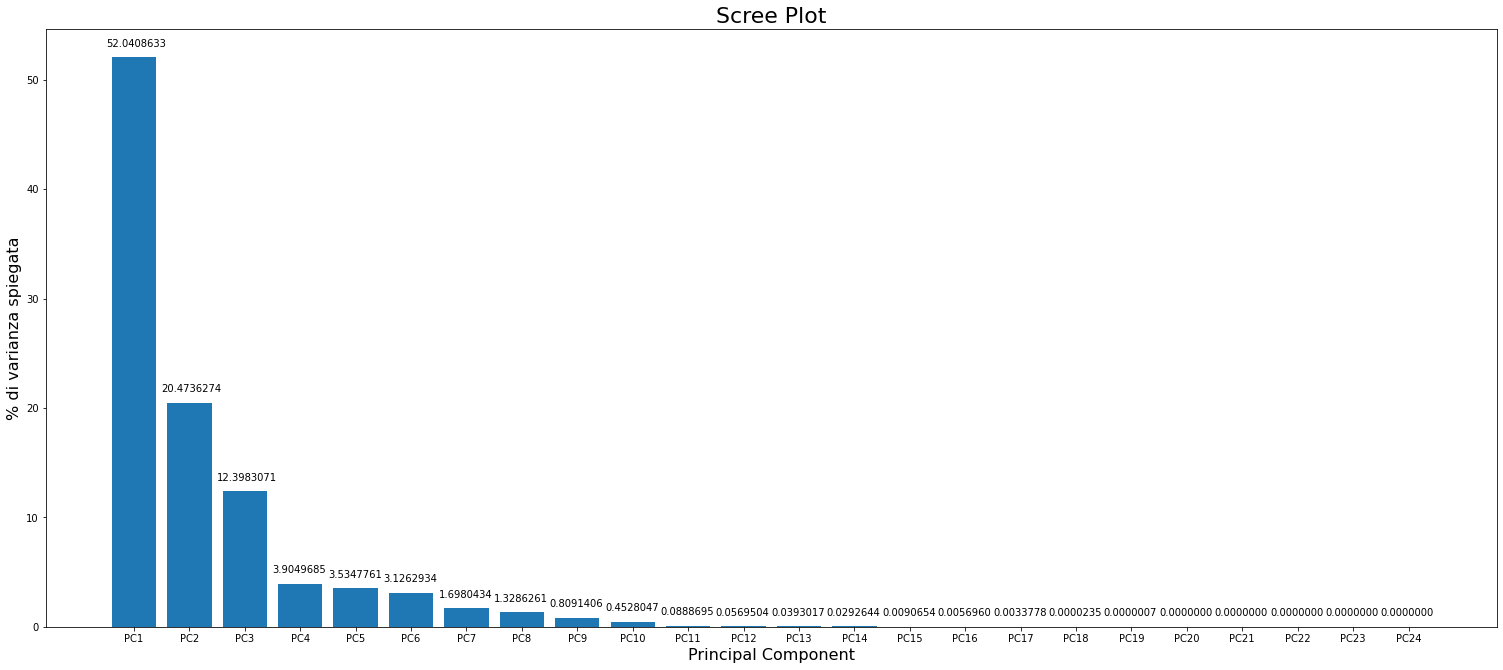

In [4]:
# Normalizzazione Z-score
x = StandardScaler().fit_transform(df)
scaled_df = pd.DataFrame(x, columns=col)
# si può fare anche con df=preprocessing.scale(df)

##############################################
################# PCA ########################

pca = PCA() #modello
pca.fit(scaled_df) #aggiunta dataset
pca_data = pca.transform(scaled_df) #creazione 

#Calcolo percentuali di varianza spiegata per ogni PCi
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=7)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Definizione PCA dataframe
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.figure(figsize = (26, 11))
plt.ylabel('% di varianza spiegata', size=16)
plt.xlabel('Principal Component', size=16)
plt.title('Scree Plot', size=22)
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels, align='center')
# Annotazione percentuali
i = 1; j = 1
for i in range(len(per_var)):
    plt.annotate('{:.7f}'.format(per_var[i]), (i+0.5, per_var[i] + j))
plt.show()

#Autovalori
eigenvalues = pca.explained_variance_

# STEP 3: Eliminazione colonne non significative (costanti, linearmente dipendenti)

Le colonne *'Active','AnonPages','avgLatency','Errors'* sono costanti, come emerge dalla matrice di correlazione. Quindi possono essere rimosse senza perdere informazioni.

Le colonne *'MemFree'* e *WriteBack'* sono invece linearmente dipendenti, come si nota dalla matrice di correlazione che riporta degli 1 fuori diagonale principale. Quindi si è scelto di rimuovere *'MemFree'* in quanto l'informazione in essa contenuta è ridondante.

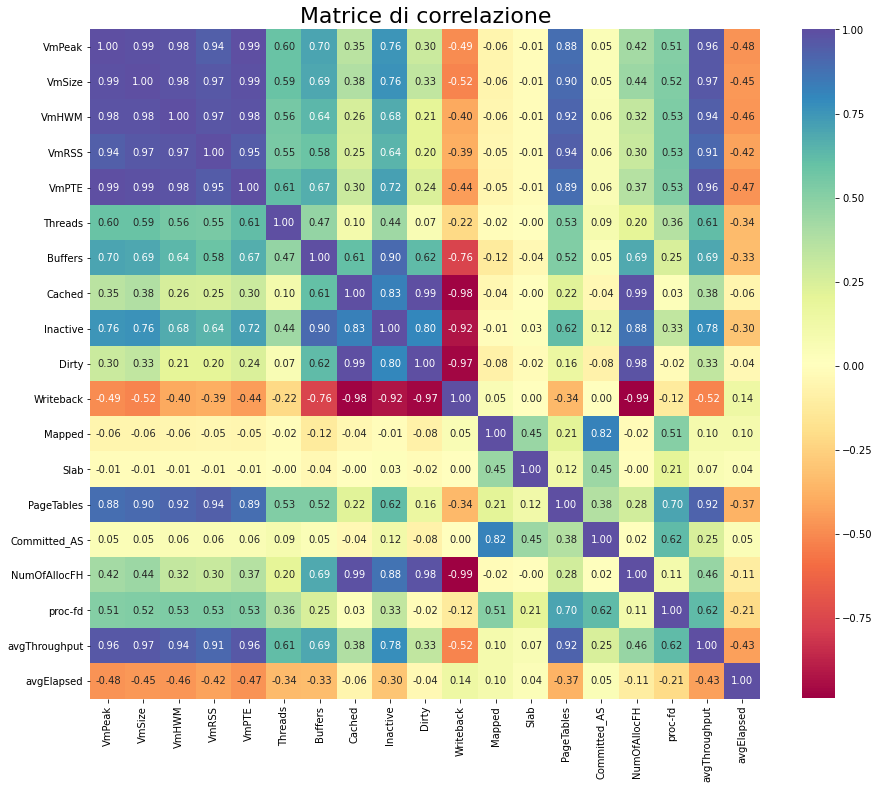

In [5]:
df_rid = df.drop(columns = ['Active','AnonPages','avgLatency','Errors','MemFree'])

corrMatrix_rid = df_rid.corr()
plt.figure(figsize = (15, 15))
plt.title('Matrice di correlazione', size=22)
sn.heatmap(corrMatrix_rid, annot=True, cmap='Spectral', fmt='.2f', square=True, cbar_kws={"shrink": .82})
plt.show();

#Modifica nomi colonne
col_rid = df_rid.columns.tolist()
col_rid = [x.strip("'") for x in col_rid]
df_rid.columns = col_rid

In [6]:
np.linalg.matrix_rank(corrMatrix_rid)

19

## STEP 4 : Normalizzazione, PCA e autovalori



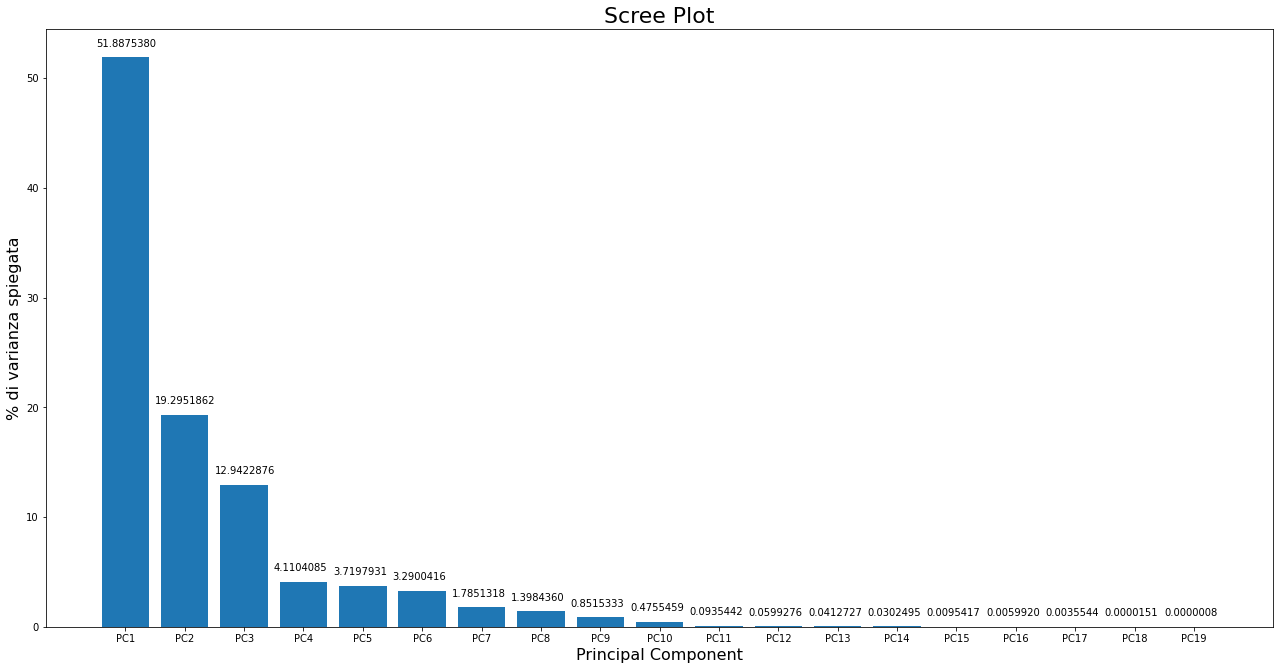

In [7]:
# Normalizzazione Z-score
x = StandardScaler().fit_transform(df_rid)
scaled_df = pd.DataFrame(x, columns=col_rid)
# si può fare anche con df=preprocessing.scale(df)

##############################################
################# PCA ########################

pca = PCA() #modello
pca.fit(scaled_df) #aggiunta dataset
pca_data = pca.transform(scaled_df) #creazione 

#Calcolo percentuali di varianza spiegata per ogni PCi
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=7)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

# Definizione PCA dataframe
pca_df = pd.DataFrame(pca_data, columns=labels)

plt.figure(figsize = (22, 11))
plt.ylabel('% di varianza spiegata', size=16)
plt.xlabel('Principal Component', size=16)
plt.title('Scree Plot', size=22)
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels, align='center')
# Annotazione percentuali
i = 1; j = 1
for i in range(len(per_var)):
    plt.annotate('{:.7f}'.format(per_var[i]), (i+0.5, per_var[i] + j))
plt.show()

#Autovalori
eigenvalues = pca.explained_variance_

### Tabella: percentuale di varianza spiegata rispetto al numero di componenti principali

In [8]:
df_variance = pd.DataFrame()
comp = []
variance = []
app = 0

for i in range(0,19):
    comp.append(i+1)
    app = app + per_var[i]
    variance.append(app)
df_variance['# PC'] = comp
df_variance['% varianza'] = variance

print(df_variance.to_string(index=False))

 # PC  % varianza
    1   51.887538
    2   71.182724
    3   84.125012
    4   88.235420
    5   91.955213
    6   95.245255
    7   97.030387
    8   98.428823
    9   99.280356
   10   99.755902
   11   99.849446
   12   99.909374
   13   99.950646
   14   99.980896
   15   99.990438
   16   99.996430
   17   99.999984
   18   99.999999
   19  100.000000


In [9]:
print("Autovalori:\n")
for i,x in enumerate(eigenvalues):
    print("\u03BB",i+1,"=", x)

Autovalori:

λ 1 = 9.861919529674706
λ 2 = 3.6673078161074426
λ 3 = 2.4598545970856605
λ 4 = 0.7812380276339967
λ 5 = 0.7069963579187262
λ 6 = 0.6253163492856347
λ 7 = 0.33928813324565044
λ 8 = 0.2657914279935232
λ 9 = 0.16184527157118334
λ 10 = 0.09038383972819888
λ 11 = 0.017779323793995157
λ 12 = 0.011390035733941876
λ 13 = 0.007844429474656163
λ 14 = 0.005749317890895283
λ 15 = 0.0018135314022888385
λ 16 = 0.0011388684300241605
λ 17 = 0.0006755696099951507
λ 18 = 2.8757321215386666e-06
λ 19 = 1.4283572519182327e-07


## Step 5: Loading Plot

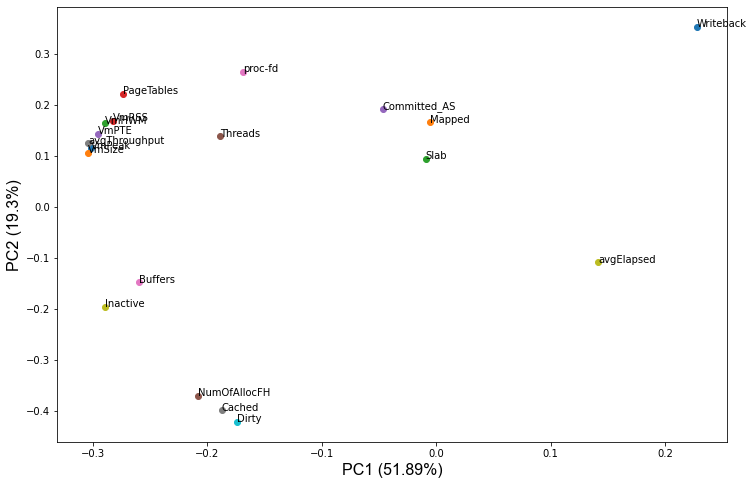

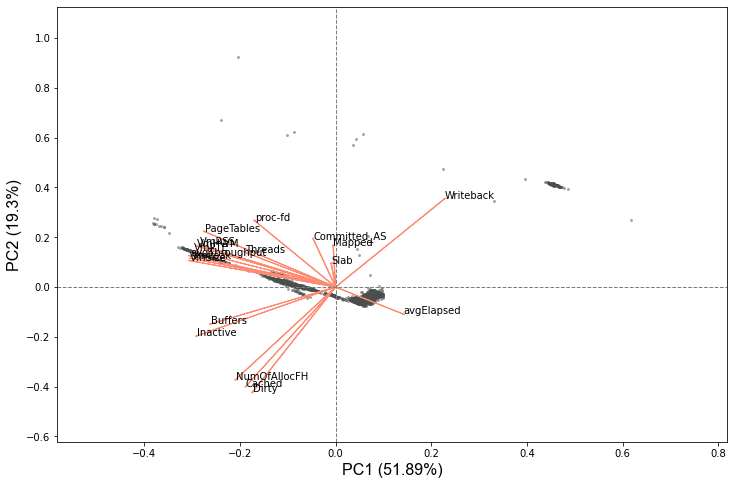

In [10]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_rid.columns.values
loadings_df = loadings_df.set_index('variable')

# get correlation matrix plot for loadings

#Matrice di correlazione PCi & Attributi iniziali
#plt.figure(figsize = (20, 20))
#ax = sn.heatmap(loadings_df, annot=True, cmap='Spectral', square=True)
#plt.show();

#togliendo show=True salva direttamente nella cartella l'immagine in png 
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df_rid.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), axlabelfontsize=16, dim = (12,8), show=True) # plotlabels= False
cluster.biplot(cscore=pca_data, loadings=loadings, labels=df_rid.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), axlabelfontsize=16, dim = (12,8), valphadot = 0.4, dotsize = 4, show=True)

## Step 6: Plotting 2D - 3D

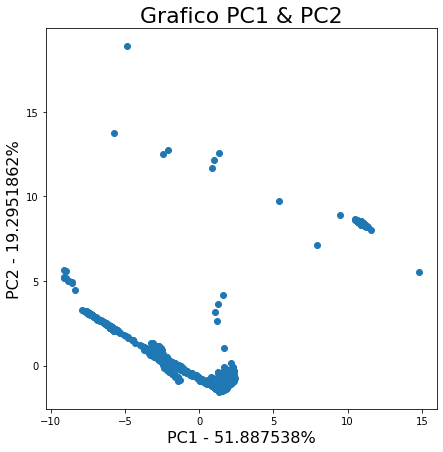

In [11]:
#############################################
############# Plotting PCA  #################

# 1) PC1 & PC2
#Plot 2D
plt.figure(figsize = (7, 7))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('Grafico PC1 & PC2', size=22)
plt.xlabel('PC1 - {0}%'.format(per_var[0]), size=16)
plt.ylabel('PC2 - {0}%'.format(per_var[1]), size=16)
plt.show()

# 2) PC1, PC2 & PC3
#Plot 3D

#fig = plt.figure(figsize = (7, 7))
#ax = Axes3D(fig)

#ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3)
#ax.set_title('Grafico PC1 & PC2 & PC3', size=20)
#ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
#ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
#ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))
#plt.show()

#######FINEZZA PLOT 3D################

# # 2) PC1, PC2 & PC3
# #Plot 3D
# import chart_studio.plotly as py
# import plotly.graph_objects as go
# import plotly.io as pio

# fig1 = go.Scatter3d(x=pca_df.PC1, y=pca_df.PC2, z=pca_df.PC3, marker=dict(opacity=0.9, reversescale=True, colorscale='Blues', size=5), line=dict (width=0.02), mode='markers')

# #Settaggio Layout
# mylayout = go.Layout(scene=dict(xaxis=dict(title="PCA1"), yaxis=dict(title="PCA2"), zaxis=dict(title="PCA3")))

# #Plotting e salvataggio file in HTML
# pio.write_html({"data": [fig1], "layout": mylayout}, auto_open=True, file="3DPlot.html")

## Step 7: Clustering

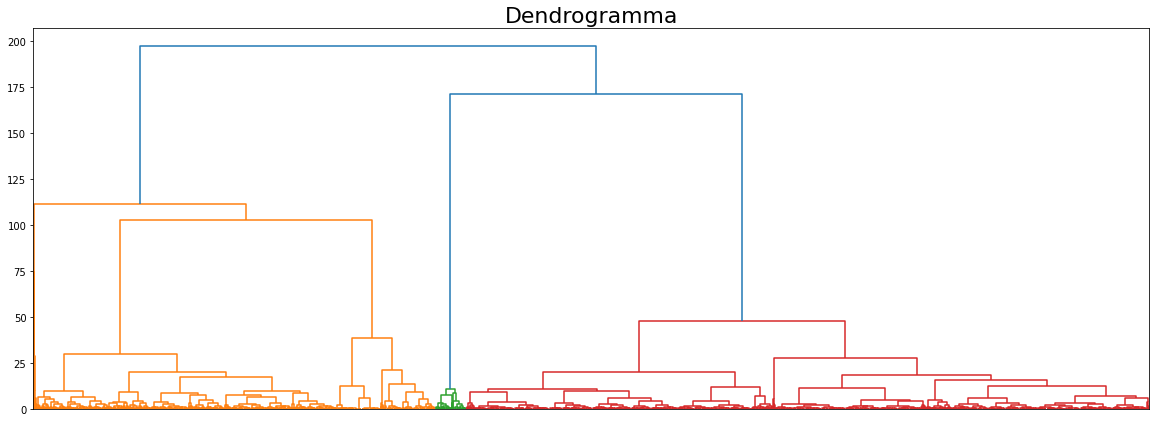

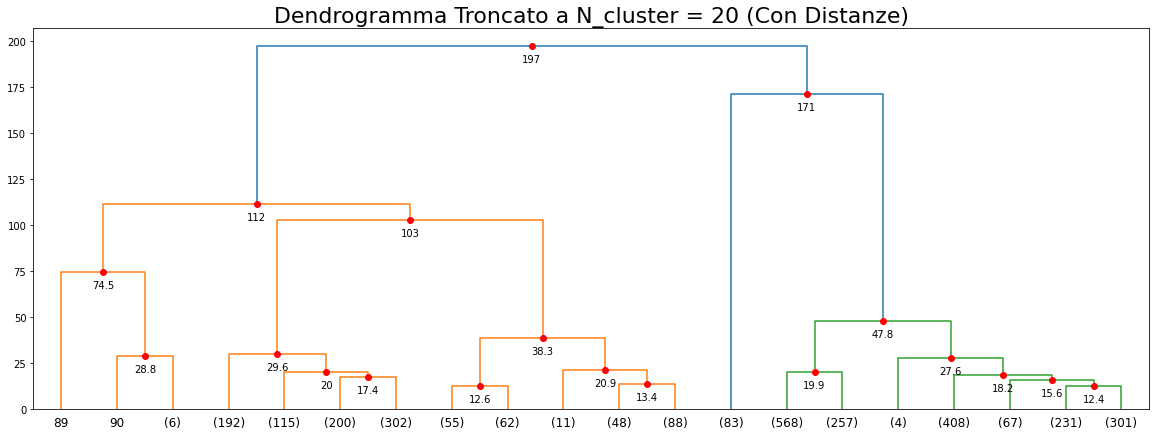

In [12]:
#Selezione 6 Principal Component per avere il 95% di varianza spiegata
pca95_df = pca_df[pca_df.columns[0:6]]


#Calcolo devianza spiegata dalla PCA 
dev_pca = ((pca95_df - pca95_df.mean(axis=0))**2).values.sum()
#Calcolo devianza totale del modello
dev_tot = ((scaled_df - scaled_df.mean(axis=0))**2).values.sum()
#dev_pca_perc2 = dev_pca/dev_tot #più precisa
#Calcolo devianza percentuale spiegata dalla PCA
dev_pca_percentuale = per_var[0:6].sum()/100

linkage_matrix = sch.linkage(pca95_df, method  = "ward")

plt.figure(figsize = (20, 7))
dendrogram = sch.dendrogram(linkage_matrix, no_labels='true')
plt.title('Dendrogramma', size=22)
plt.xlabel('')
plt.ylabel('')
plt.show()

def augmented_dendrogram(*args, **kwargs):

    ddata = sch.dendrogram(*args, **kwargs)
    distanze = []
    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            distanze.append(y)
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')
    distanze.sort(reverse=True)
    return ddata, distanze

p = 20

plt.figure(figsize = (20, 7))
_, distanze = augmented_dendrogram(linkage_matrix, p, truncate_mode='lastp')
plt.title('Dendrogramma Troncato a N_cluster = 20 (Con Distanze)', size=22)
plt.xlabel('')
plt.ylabel('')
plt.show();

distance_table= pd.DataFrame()
distance_table['Numero cluster'] = range(1,p)
distance_table['Distanza'] = distanze

### Stima devianza persa da PCA + Clustering

Proporzione per capire più o meno quanta varianza x perdo: 197:100=distance:x   es scelgo 10 cluster, ho distance= 27.6
x=100*27.6 / 197 = 14%

In [13]:
np.set_printoptions(threshold=np.inf)  
pd.set_option("display.max_rows", None, "display.max_columns", None)

## TRADE OFF

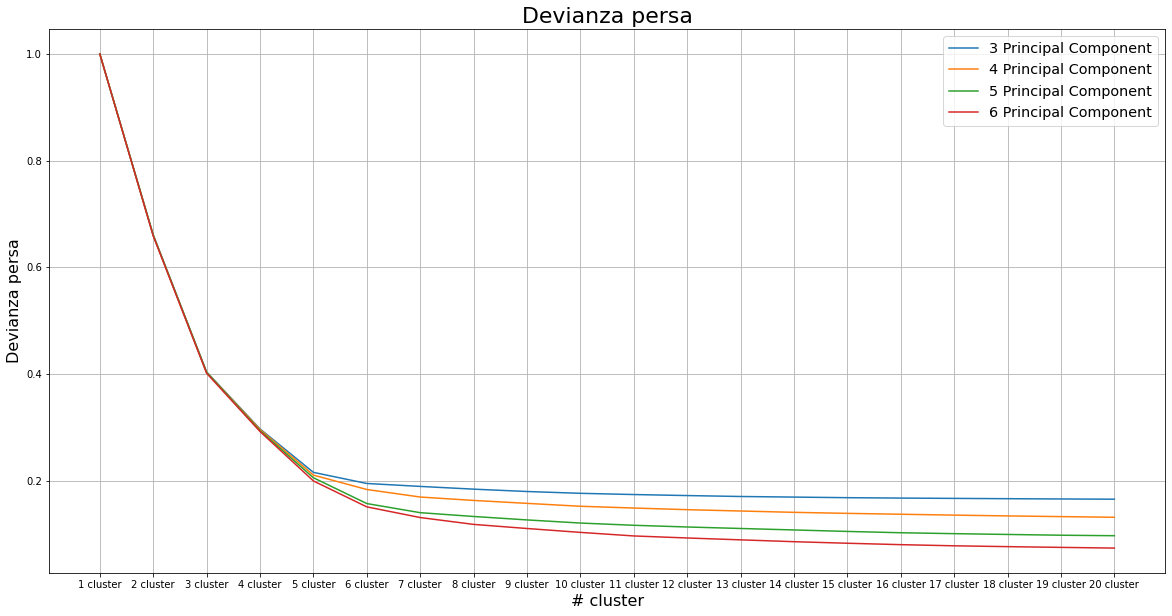

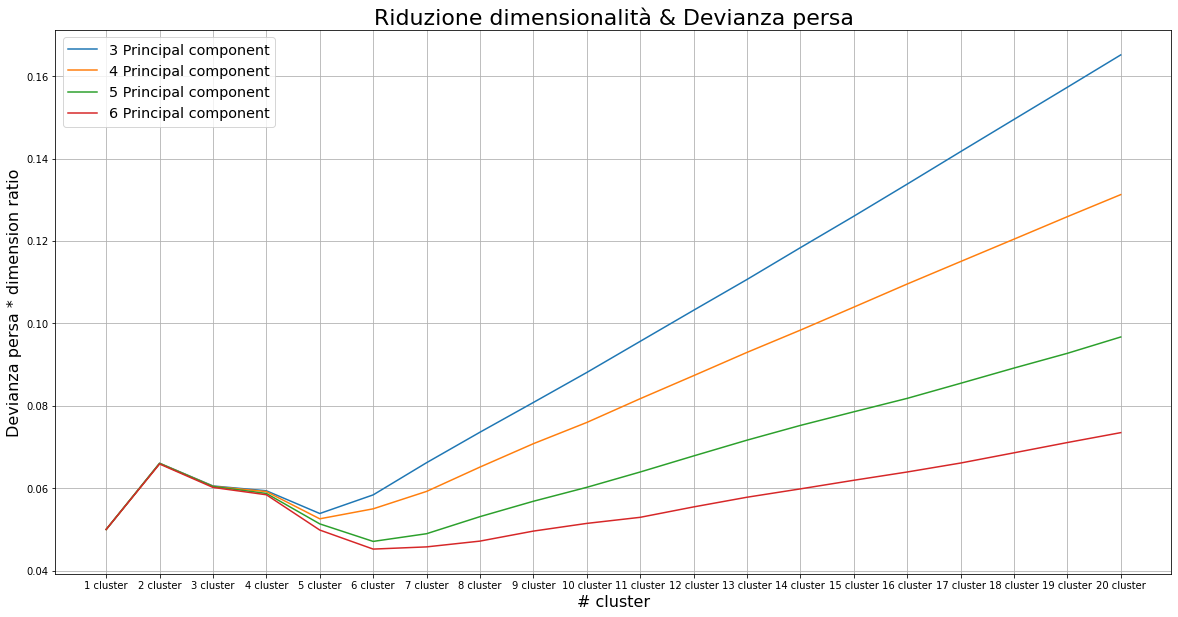

In [14]:
pca_df_dict={}

scelta_cluster_dict={}

cluster_df_dict={}

#Calcolo devianza totale del modello
dev_tot = ((scaled_df - scaled_df.mean(axis=0))**2).values.sum()

#Calcolo dimensione totale DATASET di partenza
dim_tot = scaled_df.size

min_pc = 3
max_pc = 6

numero_cluster = 20;

for k in range(min_pc, max_pc+1):
    
    pca_df_dict[k] = pd.DataFrame(pca_df[pca_df.columns[0:k]])


    #Calcolo devianza spiegata dalla PCA 
    dev_pca = ((pca_df_dict[k] - pca_df_dict[k].mean(axis=0))**2).values.sum()
    #dev_pca_perc2 = dev_pca/dev_tot #più precisa
    #Calcolo devianza percentuale spiegata dalla PCA
    dev_pca_percentuale = per_var[0:k+1].sum()/100

    linkage_matrix = sch.linkage(pca_df_dict[k], method  = "ward")

#     plt.figure(figsize = (20, 7))
#     dendrogram = sch.dendrogram(linkage_matrix, no_labels='true')
#     plt.title('Dendrogramma', size=22)
#     plt.xlabel('')
#     plt.ylabel('')
#     plt.show()

#     plt.figure(figsize = (20, 7))
#     _, distanze = augmented_dendrogram(linkage_matrix, numero_cluster, truncate_mode='lastp')
#     plt.title('Dendrogramma Troncato a N_cluster = 20 (Con Distanze)', size=22)
#     plt.xlabel('')
#     plt.ylabel('')
#     plt.show();

#     distance_table= pd.DataFrame()
#     distance_table['Numero cluster'] = range(1,p)
#     distance_table['Distanza'] = distanze


    cluster_df = pd.DataFrame()
    
    scelta_cluster_dict[k] = pd.DataFrame(columns=["N cluster", "dev_loss", "dev_rimasta", "dim_ratio"])

    for p in range(1,numero_cluster+1):
        array_dist = fcluster(linkage_matrix, p, criterion='maxclust')
        col_label = str(p)+" cluster"
        cluster_df[col_label]=array_dist
    
    
    
    cluster_df_dict[k] = cluster_df
        
    for cont,i in enumerate(cluster_df.columns, 1):
        dev_intra = 0; dev_inter = 0

        gruppi = cluster_df[i].groupby(cluster_df[i])
        for gr in range(1,max(cluster_df[i])+1):
            gruppetto = pd.DataFrame(gruppi.get_group(gr))
            gruppetto = gruppetto.join(pca_df_dict[k])
            gruppetto = gruppetto.drop(columns=[i])
            centroid = gruppetto.mean(axis = 0)
            centroid = centroid.to_numpy()
            dev_intra = dev_intra + ((gruppetto-centroid)**2).values.sum()
            dev_inter = dev_inter + len(gruppetto)*(((centroid-pca_df_dict[k].mean(axis=0))**2).values.sum())


        dev_lost_percentuale = (1 - dev_pca/dev_tot)+(dev_intra/dev_tot)
        dev_pca_cl_per = dev_inter/dev_tot
        dim_ratio =  (cont * k) / dim_tot
        
#         print((dev_intra + dev_inter)/dev_pca)

        new_row = {'N cluster':i, 'dev_loss':dev_lost_percentuale, 'dev_rimasta':dev_pca_cl_per, 'dim_ratio':dim_ratio}
        scelta_cluster_dict[k] = scelta_cluster_dict[k].append(new_row, ignore_index=True)


plt.figure(figsize = (20, 10))
for k in range(min_pc,max_pc+1):
    plt.plot(scelta_cluster_dict[k]["N cluster"], scelta_cluster_dict[k]["dev_loss"], label='{} Principal Component'.format(k))
plt.legend(loc='upper right',fontsize = 'x-large')
plt.title('Devianza persa', size=22)
plt.xlabel('# cluster', size=16)
plt.ylabel('Devianza persa', size=16)
plt.grid()
plt.show()

plt.figure(figsize = (20, 10))
for k in range(min_pc,max_pc+1):
#         plt.plot(scelta_cluster_dict[k]["N cluster"], scelta_cluster_dict[k]["dev_loss"]*((scelta_cluster_dict[k]["dim_ratio"]- min(scelta_cluster_dict[k]["dim_ratio"]))/(max(scelta_cluster_dict[k]["dim_ratio"]) - min(scelta_cluster_dict[k]["dim_ratio"]))), label='{} Principal component'.format(k))
    plt.plot(scelta_cluster_dict[k]["N cluster"], scelta_cluster_dict[k]["dev_loss"]*(scelta_cluster_dict[k]["dim_ratio"]/max(scelta_cluster_dict[k]["dim_ratio"])), label='{} Principal component'.format(k))
plt.legend(loc='upper left',fontsize = 'x-large')
plt.title('Riduzione dimensionalità & Devianza persa', size=22)
plt.xlabel('# cluster', size=16)
plt.ylabel('Devianza persa * dimension ratio', size=16)
plt.grid()
plt.show()

Come si evince da tale grafico, il miglior trade-off tra la dimensionalità del workload sintetico (#PCA * #cluster) e la devianza persa è rappresentato dalla scelta di 6 Componenti Principali e di 6 cluster, in quanto questa configurazione minimizza la devianza persa e massimizza la riduzione del workload.

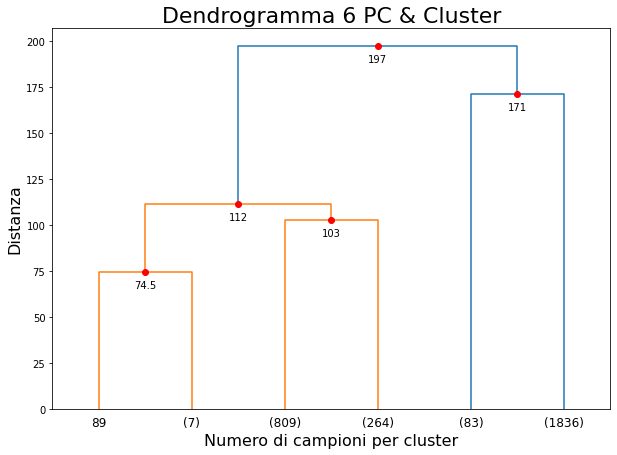

   Numero cluster    Distanza
0               1  197.209308
1               2  171.339476
2               3  111.589392
3               4  102.785601
4               5   74.464585


In [15]:
linkage_matrix = sch.linkage(pca_df_dict[6], method  = "ward")
plt.figure(figsize = (10, 7))
_, distanze = augmented_dendrogram(linkage_matrix, 6, truncate_mode='lastp')
plt.title('Dendrogramma 6 PC & Cluster', size=22)
plt.xlabel('Numero di campioni per cluster', size = 16)
plt.ylabel('Distanza', size = 16)
plt.show();

distance_table= pd.DataFrame()
distance_table['Numero cluster'] = range(1,6)
distance_table['Distanza'] = distanze

print(distance_table)

In [16]:
samples = cluster_df_dict[6].groupby("6 cluster").sample()

samples_df = pd.DataFrame()

samples_df["cluster"] = samples["6 cluster"]

syntetic_workload = df.join(samples_df, how="inner")
syntetic_workload.drop(columns=['cluster'], inplace=True)
syntetic_workload

,VmPeak,VmSize,VmHWM,VmRSS,VmPTE,Threads,MemFree,Buffers,Cached,Active,Inactive,Dirty,Writeback,AnonPages,Mapped,Slab,PageTables,Committed_AS,NumOfAllocFH,proc-fd,avgThroughput,avgElapsed,avgLatency,Errors
37,152272,150216,25216,25208,160,31,5605424,32668,334644,0,141428,303368,5605424,8159224,184,0,77468,23772,27812,7192,294548,1020,0,2
83,153484,151436,26612,26468,160,45,5160008,83244,656460,0,230156,597448,5160008,8159224,221152,0,87804,25312,89796,7796,304888,2040,0,2
89,170344,170340,31144,31140,200,52,4655664,89480,1090572,0,541220,773332,4655664,8159224,324400,1760,134500,29956,106788,8028,365264,2040,0,2
1729,172392,171364,33228,31792,200,44,4577332,187924,1117844,0,461536,928376,4577332,8159224,160,0,84164,23844,110904,7204,314880,1020,0,2
1971,185964,180072,41280,37040,232,119,4563072,193364,1117956,0,476280,924428,4563072,8159224,32,0,89592,23848,113872,7236,326532,1020,0,2
2984,215352,206136,61784,53204,312,9,4539096,204652,1118496,0,521196,907468,4539096,8159224,152,0,105544,23848,110188,7320,345200,1020,0,2


In [17]:
# dfi.export(syntetic_workload.head(),"img//wl_synt.png", max_cols=10)

In [18]:
syntetic_workload.to_csv('syntetic_workload.csv')

In [19]:
syn = pca_df_dict[6].join(samples_df, how="inner")
syn.drop(columns=['cluster'], inplace=True)
syn

,PC1,PC2,PC3,PC4,PC5,PC6
37,10.949130,8.443548,-2.650056,0.822237,-0.081347,-0.011998
83,5.372292,9.720744,14.488085,-3.338651,-6.207555,0.507623
89,-4.891286,18.927369,52.301081,21.015948,28.859324,-3.075886
1729,0.847155,-1.090956,0.221636,0.714586,-0.441468,0.067945
1971,-1.519255,0.020094,-0.207930,0.592833,-0.432364,-1.075429
2984,-5.906095,2.213839,-0.822427,-1.418327,1.311976,2.148604


In [20]:
dfi.export(syn.head(),"img//wl_synt_pca.png")

In [21]:
scelta_cluster_dict[6]
# print(scelta_cluster_dict[6].loc[5,"dev_rimasta"])
# print(scelta_cluster_dict[5].loc[5,"dev_rimasta"])

,N cluster,dev_loss,dev_rimasta,dim_ratio
0,1 cluster,1.000000,0.000000,0.000105
1,2 cluster,0.658846,0.341154,0.000211
2,3 cluster,0.401327,0.598673,0.000316
3,4 cluster,0.292097,0.707903,0.000421
4,5 cluster,0.199423,0.800577,0.000526
5,6 cluster,0.150783,0.849217,0.000632
6,7 cluster,0.130770,0.869230,0.000737
7,8 cluster,0.117928,0.882072,0.000842
8,9 cluster,0.110225,0.889775,0.000947
9,10 cluster,0.102939,0.897061,0.001053


# NOTE

 - vedere trade off  **OK**
 - scegliere campione per ogni cluster  **OK**
 - fare dendrogramma finale con numero di cluster scelti  **OK**
 - VEDERE DOMANDA OPZIONALE:COME VEDERE LA DEV IN MANIERA ALTERNATIVA?

In [22]:
# numero_cluster = 20;

# cluster_df = pd.DataFrame()

# for p in range(5,numero_cluster+1):
#     array_dist = fcluster(linkage_matrix, p, criterion='maxclust')
#     col_label = str(p)+" cluster"
#     cluster_df[col_label]=array_dist
        
    
# # np.set_printoptions(threshold=np.inf)  
# # pd.set_option("display.max_rows", None, "display.max_columns", None)
# # cluster_df

# scelta_cluster = pd.DataFrame(columns=["N cluster", "dev_loss", "dev_rimasta"])

# for i in cluster_df.columns:
#     dev_intra = 0; dev_inter = 0
    
#     gruppi = cluster_df[i].groupby(cluster_df[i])
#     for gr in range(1,max(cluster_df[i])+1):
#         gruppetto = pd.DataFrame(gruppi.get_group(gr))
#         gruppetto = gruppetto.join(pca95_df)
#         gruppetto = gruppetto.drop(columns=[i])
#         centroid = gruppetto.mean(axis = 0)
#         centroid = centroid.to_numpy()
#         dev_intra = dev_intra + ((gruppetto-centroid)**2).values.sum()
#         dev_inter = dev_inter + len(gruppetto)*(((centroid-pca95_df.mean(axis=0))**2).values.sum())

#    # print((dev_intra + dev_inter)/dev_pca)

#     dev_lost_percentuale = (1 - dev_pca/dev_tot)+(dev_intra/dev_tot)
#     dev_pca_cl_per = dev_inter/dev_tot
    
#     new_row = {'N cluster':i, 'dev_loss':dev_lost_percentuale, 'dev_rimasta':dev_pca_cl_per}
#     scelta_cluster = scelta_cluster.append(new_row, ignore_index=True)

# print(scelta_cluster)

# # scelta_cluster.plot("N cluster","dev_loss",figsize = (20, 7))

# plt.figure(figsize = (20, 7))
# plt.plot(scelta_cluster["N cluster"], scelta_cluster["dev_loss"])
# plt.plot(scelta_cluster["N cluster"][6], scelta_cluster["dev_loss"][6], 'ro');

## EXTRA

In [25]:
# import pandas as pd
# import numpy as np
# import io
# import os
# import pathlib
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# from pca import pca

# from sklearn import preprocessing


# ############################################
# ############### Parsing dati ###############

# #Lettura dati da dataset
# path = str(pathlib.Path().absolute()) + "/EsercizioPCA_CLustering_versStudenti.xlsx"

# #Modifica nomi colonne
# col = df.columns.tolist()
# col = [x.strip("'") for x in col]
# df.columns = col


# df=preprocessing.scale(df)


# model = pca()
# out = model.fit_transform(df)
# #print(out['topfeat'])
# #print(out['outliers'])

# model.plot();

# ax = model.biplot(n_feat=10, legend=False);
# ax = model.biplot3d(n_feat=10, legend=False);



# model.biplot(legend=True, SPE=True, hotellingt2=True);
# model.biplot3d(legend=True, SPE=True, hotellingt2=True);

# # Create only the scatter plots
# model.scatter(legend=True, SPE=True, hotellingt2=True);
# model.scatter3d(legend=True, SPE=True, hotellingt2=True);


# # Select the outliers
# df_outliers = df[out['outliers']['y_bool'],:]

# # Select the other set
# df_normal = df[~out['outliers']['y_bool'],:]

# # Outliers tramite comando
# #import pca
# outliers_hot = pca.hotellingsT2(out['PC'].values, alpha=0.05)
# outliers_spe = pca.spe_dmodx(out['PC'].values, n_std=2)


# # Solo frecce
# model.biplot(cmap=None, label=False, legend=False);

In [27]:
(171+103+74.5)/dev_tot

0.006114035087719298